https://www.kaggle.com/code/tariqsays/eda-on-on-zomato-dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('zomato.csv',encoding="ISO-8859-1")
df2 = pd.read_excel('Country-code.xlsx')

# why we should use encoding 

UTF-8 (short for "Unicode Transformation Format - 8-bit") is a character encoding standard that is widely used to represent text in computers, applications, and data transmission. It is designed to encode all characters in the Unicode character set, which includes almost every written language, symbols, and emojis.

Common Encodings:

utf-8: The most common encoding for modern files (default for pd.read_csv()).

ISO-8859-1 or latin1: Commonly used for Western European languages.

cp1252: A Microsoft Windows encoding for Western European characters.

utf-16 or utf-32: For files with more complex character sets.

ascii: For files with only basic English characters.


In [16]:
print(df.head())

NameError: name 'df' is not defined

In [5]:
df.head() 

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [8]:
#pd.set_option('display.float_format', '{:.2f}'.format) 
pd.set_option('display.float_format', lambda x:'%.2f' % x) #applys globally
#pd.reset_option('display.float_format') #resets globally
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.00,9551.00,9551.00,9551.00,9551.00,9551.00,9551.00,9551.00
mean,9051128.35,18.37,64.13,25.85,1199.21,1.80,2.67,156.91
std,8791521.28,56.75,41.47,11.01,16121.18,0.91,1.52,430.17
min,53.00,1.00,-157.95,-41.33,0.00,1.00,0.00,0.00
25%,301962.50,1.00,77.08,28.48,250.00,1.00,2.50,5.00
50%,6004089.00,1.00,77.19,28.57,400.00,2.00,3.20,31.00
75%,18352291.50,1.00,77.28,28.64,700.00,2.00,3.70,131.00
max,18500652.00,216.00,174.83,55.98,800000.00,4.00,4.90,10934.00


In [9]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [11]:
df = pd.merge(df,df2, on = 'Country Code' , how =  'left') 

In [12]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.03,14.57,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.80,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.01,14.55,Japanese,...,Yes,No,No,No,3,4.50,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.06,14.58,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.40,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.06,14.59,"Japanese, Sushi",...,No,No,No,No,4,4.90,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.06,14.58,"Japanese, Korean",...,Yes,No,No,No,4,4.80,Dark Green,Excellent,229,Phillipines


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [14]:
df['Country'].value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [15]:
df_india = df[df['Country'] == 'India']
df_india

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.01,27.16,"North Indian, Mughlai",...,No,No,No,No,3,3.90,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.00,0.00,"North Indian, Mughlai",...,No,No,No,No,2,3.50,Yellow,Good,71,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.01,27.16,North Indian,...,No,No,No,No,2,3.60,Yellow,Good,94,India
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",78.00,27.20,Rajasthani,...,No,No,No,No,2,4.00,Green,Very Good,87,India
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.01,27.20,"North Indian, Chinese, Mughlai",...,No,No,No,No,3,4.20,Green,Very Good,177,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,2800100,D Cabana,1,Vizag,"Beach Road, Near Bus Stop, Sagar Nagar, Visakh...",Sagar Nagar,"Sagar Nagar, Vizag",83.36,17.76,"Continental, Seafood, Chinese, North Indian, B...",...,No,No,No,No,2,3.60,Yellow,Good,193,India
9272,2800418,Kaloreez,1,Vizag,"Plot 95, Opposite St. Lukes Nursing School, Da...",Siripuram,"Siripuram, Vizag",0.00,0.00,"Cafe, North Indian, Chinese",...,No,No,No,No,2,3.70,Yellow,Good,85,India
9273,2800881,Plot 17,1,Vizag,"Plot 17, Gangapur Layout, Siripuram, Vizag",Siripuram,"Siripuram, Vizag",83.32,17.72,"Burger, Pizza, Biryani",...,No,No,No,No,2,4.30,Green,Very Good,172,India
9274,2800042,Vista - The Park,1,Vizag,"The Park, Beach Road, Pedda Waltair, Lawsons B...","The Park, Lawsons Bay","The Park, Lawsons Bay, Vizag",83.34,17.72,"American, North Indian, Thai, Continental",...,No,No,No,No,4,3.80,Yellow,Good,74,India


In [16]:
#seaborn don't have a pie chart
index=df.Country.value_counts().index
values=df.Country.value_counts().values

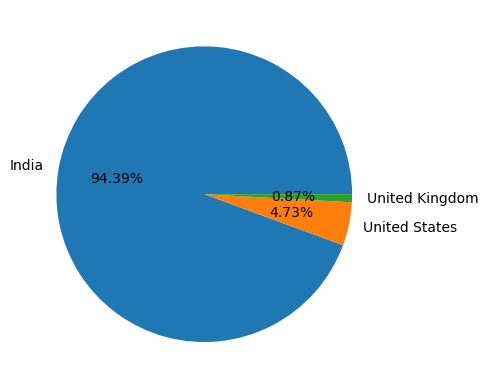

"\nHow to Use autopct\nYou can pass the autopct parameter in the following ways:\n\n1. String Format\nA format string defines how the percentage should be displayed.\n\nSyntax: autopct='%<precision>.<decimal>f%%'\nprecision: Minimum number of digits to display.\ndecimal: Number of decimal places to include.\n%%: Escapes the % symbol to show it as a literal percentage sign.\n"

In [17]:
plt.pie(values[:3],labels=index[:3],autopct='%.2f%%') #shows only top 3
plt.show()
'''
How to Use autopct
You can pass the autopct parameter in the following ways:

1. String Format
A format string defines how the percentage should be displayed.

Syntax: autopct='%<precision>.<decimal>f%%'
precision: Minimum number of digits to display.
decimal: Number of decimal places to include.
%%: Escapes the % symbol to show it as a literal percentage sign.
'''

In [18]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.03,14.57,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.80,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.01,14.55,Japanese,...,Yes,No,No,No,3,4.50,Dark Green,Excellent,591,Phillipines


In [40]:
Ratings=df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Ratings_count'})

In [46]:
Ratings.head()

,Aggregate rating,Rating color,Rating text,Ratings_count
0,0.00,White,Not rated,2148
1,1.80,Red,Poor,1
2,1.90,Red,Poor,2
3,2.00,Red,Poor,7
4,2.10,Red,Poor,15


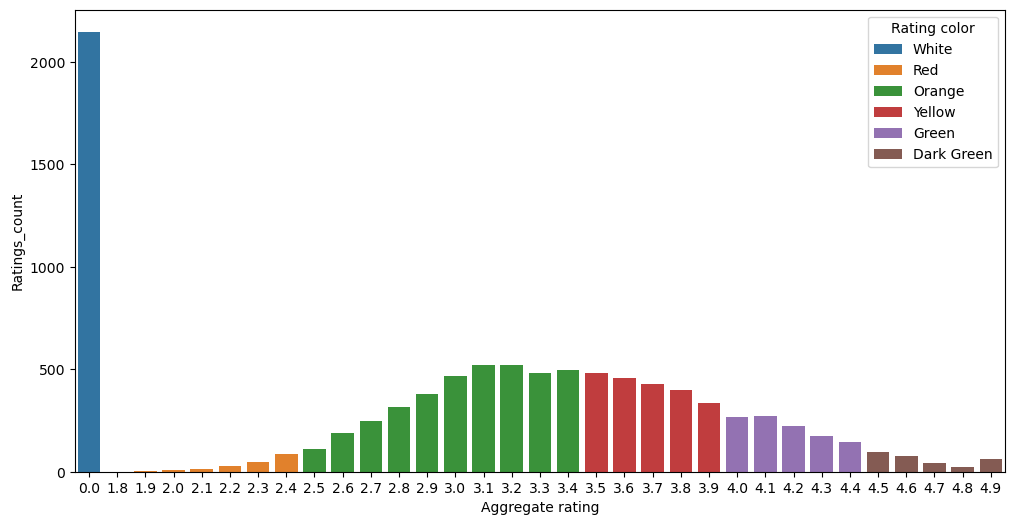

In [74]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Aggregate rating', y = 'Ratings_count',hue ='Rating color', data = Ratings)
plt.show()

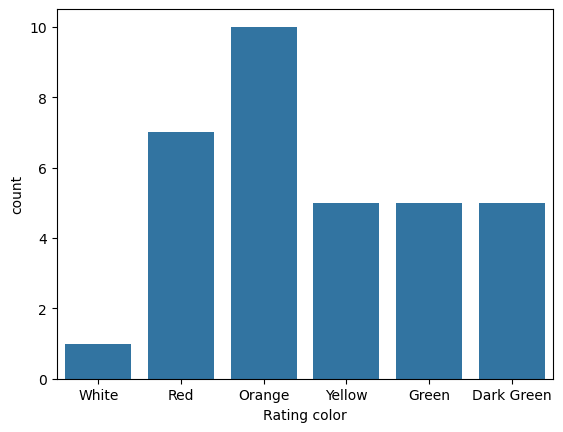

In [64]:
sns.countplot(x = 'Rating color', data = Ratings)
plt.show()

# plot shows they are 10 diff ratings in orange 

In [82]:
df.groupby(['Aggregate rating','Country']).size().reset_index().sort_values(by='Aggregate rating')

,Aggregate rating,Country,0
0,0.00,Brazil,5
1,0.00,India,2139
2,0.00,United Kingdom,1
3,0.00,United States,3
4,1.80,India,1
...,...,...,...
216,4.90,South Africa,3
217,4.90,Sri Lanka,1
218,4.90,Turkey,3
219,4.90,UAE,4


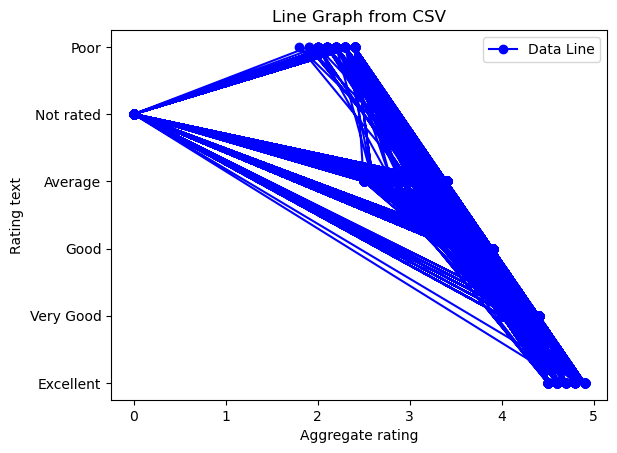

In [30]:
plt.plot(df['Aggregate rating'], df['Rating text'], marker='o', linestyle='-', color='b', label='Data Line')
plt.xlabel('Aggregate rating')
plt.ylabel('Rating text')
plt.title('Line Graph from CSV')
plt.legend()
plt.show()

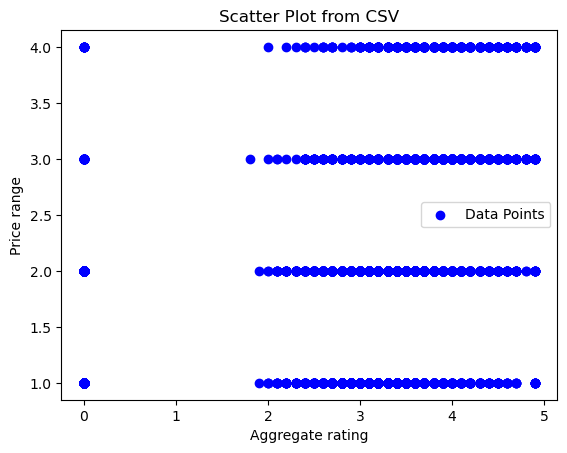

In [34]:
# Scatter plot
plt.scatter(df['Aggregate rating'], df['Price range'], color='b', marker='o', label='Data Points')

# Add labels and title
plt.xlabel('Aggregate rating')
plt.ylabel('Price range')
plt.title('Scatter Plot from CSV')

# Show legend
plt.legend()

# Display the plot
plt.show()